In [56]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import MaxNLocator
import seaborn as sns

### 5-agent :

In [118]:
df_5_agents = pd.read_csv('logs/5_agents.csv')
df_5_agents.head()

,convex,n_trial,n_agents,iters,mpc_iter,obj_value,dual_res,primal_res
0,True,NaN,5,1,0,2268.506914,#NAME?,35.875022
1,True,NaN,5,2,0,2269.788449,-1.202392885,28.352100
2,True,NaN,5,3,0,2272.353659,-0.943274272,22.434205
3,True,NaN,5,4,0,2274.445389,-0.727848751,17.873298
4,True,NaN,5,5,0,2275.077562,-0.585221036,14.198333


In [119]:
convex_5_agents_df = df_5_agents.loc[df_5_agents['convex']==True]
nonconvex_5_agents_df = df_5_agents.loc[df_5_agents['convex']==False]

In [120]:
convex_5_agents_obj = convex_5_agents_df.groupby(['n_agents', 'mpc_iter'])['obj_value'].last().reset_index()

In [124]:
nonconvex_5_agents_obj = nonconvex_5_agents_df.groupby(['n_agents', 'mpc_iter'])['obj_value'].last().reset_index()

In [125]:
from matplotlib import font_manager
import matplotlib
font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
# font_list
from matplotlib.font_manager import FontProperties

In [126]:
font_path = '/usr/share/fonts/truetype/palatino/Palatino Normal.ttf'
# Create FontProperties object with the specified font file
font_prop = FontProperties(fname=font_path)

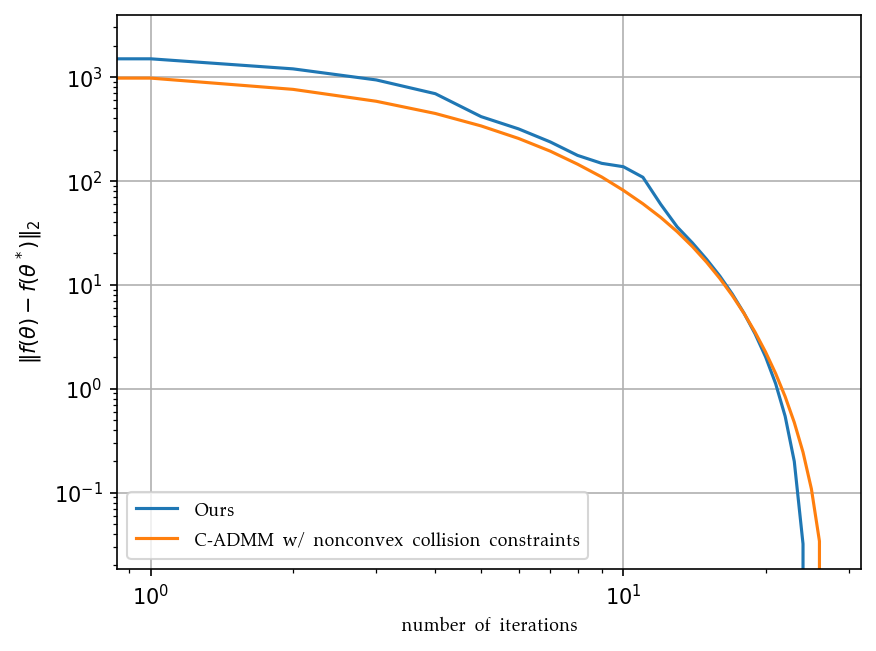

In [129]:
plt.figure(dpi=150)
plt.plot([np.linalg.norm(convex_5_agents_obj['obj_value'].values[i] - convex_5_agents_obj['obj_value'].values[-1]) for i in range(convex_5_agents_obj.shape[0])],label='Ours')
plt.plot([np.linalg.norm(nonconvex_5_agents_obj['obj_value'].values[i] - nonconvex_5_agents_obj['obj_value'].values[-1]) for i in range(nonconvex_5_agents_obj.shape[0])], label='C-ADMM w/ nonconvex collision constraints')
# plt.plot(convex_5_agents_obj['obj_value'],label='Ours')
# plt.plot(nonconvex_5_agents_obj['obj_value'] , label='C-ADMM w/ nonconvex collision constraints')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend(prop = font_prop)
plt.xlabel('number of iterations',fontproperties=font_prop)
# plt.ylabel(r'$\|f(\theta) - f(\theta^*)\|_2$',fontproperties=font_prop);
plt.ylabel(r'$\|f(\theta) - f(\theta^*)\|_2$', fontproperties=font_prop);
# plt.savefig('Convergence_comparison_5_agents.png',dpi=200)

### 3 agents:

In [146]:
df_3_agents = pd.read_csv('logs/3_agents.csv')
df_3_agents.head()

,convex,n_trial,n_agents,iters,mpc_iter,obj_value,dual_res,primal_res
0,True,NaN,3,1,0,2393.520928,#NAME?,17.627747
1,True,NaN,3,2,0,2400.061404,-2.51668161,11.474012
2,True,NaN,3,3,0,2406.291282,-1.615836646,7.522608
3,True,NaN,3,4,0,2410.982375,-1.061484235,4.927657
4,True,NaN,3,5,0,2409.784635,-0.662506255,3.311858


In [147]:
convex_3_agents_df = df_3_agents.loc[df_3_agents['convex']==True]
nonconvex_3_agents_df = df_3_agents.loc[df_3_agents['convex']==False]

In [148]:
convex_3_agents_obj = convex_3_agents_df.groupby(['n_agents', 'mpc_iter'])['obj_value'].last().reset_index()
nonconvex_3_agents_obj = nonconvex_3_agents_df.groupby(['n_agents', 'mpc_iter'])['obj_value'].last().reset_index()

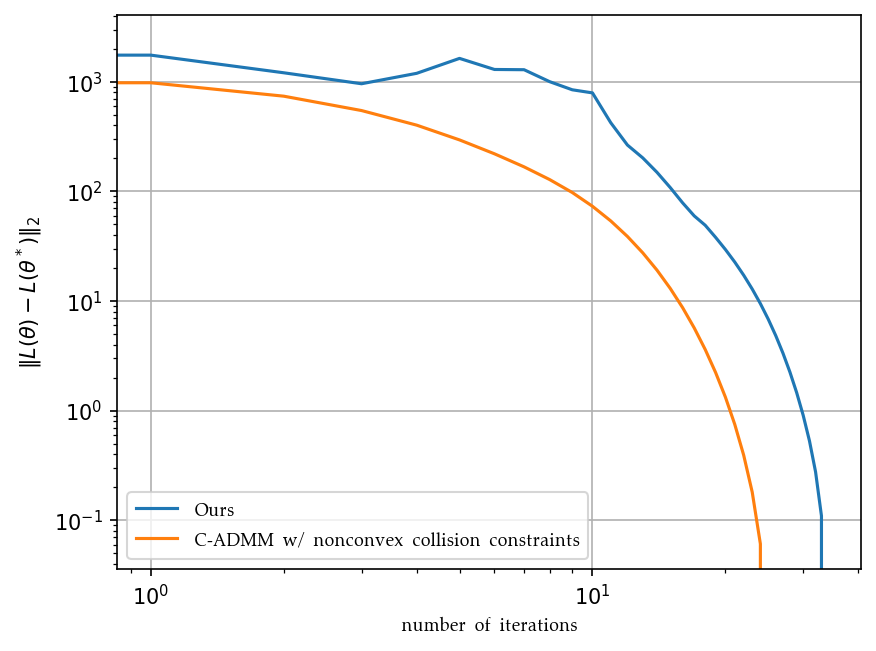

In [151]:
plt.figure(dpi=150)
plt.plot([np.linalg.norm(convex_3_agents_obj['obj_value'].values[i] - convex_3_agents_obj['obj_value'].values[-1]) for i in range(convex_3_agents_obj.shape[0])],label='Ours')
plt.plot([np.linalg.norm(nonconvex_3_agents_obj['obj_value'].values[i] - nonconvex_3_agents_obj['obj_value'].values[-1]) for i in range(nonconvex_3_agents_obj.shape[0])], label='C-ADMM w/ nonconvex collision constraints')
# plt.plot(convex_3_agents_df['obj_value'].values,label='Ours')
# plt.plot(nonconvex_3_agents_df['obj_value'].values,label='C-ADMM w/ nonconvex collision constraints')
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.legend(prop = font_prop)
plt.xlabel('number of iterations',fontproperties=font_prop)
# plt.ylabel(r'$\|f(\theta) - f(\theta^*)\|_2$',fontproperties=font_prop);
plt.ylabel(r'$\|L(\theta) - L(\theta^*)\|_2$', fontproperties=font_prop);
# plt.savefig('Convergence_comparison_3_agents.png',dpi=200)